<a href="https://colab.research.google.com/github/RobBurnap/Bioinformatics-MICR4203-MICR5203/blob/main/notebooks/Pairwise-Alignment_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


BIOINFO4/5203 — Colab Exercise Template

Use this template for every weekly exercise. It standardizes setup, data paths, and the final summary so grading in Canvas is quick.

Workflow

    Click the "Open in Colab" link in Canvas (points to this notebook in GitHub).
    Run Setup cells (installs and mounts Google Drive).
    Run the Exercise cells (edit as instructed for each lecture).
    Verify the Results Summary prints the values requested by Canvas.
    File → Print → Save as PDF and upload .ipynb + PDF to Canvas.

    Instructor note (delete in student copy if desired):

        Place datasets for this lecture at: Drive → BIOINFO4-5203-F25 → Data → Lxx_topic
        Update the constants in Config below: COURSE_DIR, LECTURE_CODE (e.g., L05), and TOPIC.
        For heavy jobs (trees, assemblies), provide the PETE output files in the same Data folder so students can analyze them here if the queue is busy.



**Auto‑setup + course folder (uses your Teaching path)**

##A. Mount Google Drive, Import Coding Libraries Necessary for Running Subsequent Code

In [4]:

# Install FIRST, then import
%pip install -q biopython       # Install the Biopython package quietly (-q suppresses most output) so we can work with biological sequence files

from google.colab import drive  # Import the module that lets Colab interact with Google Drive
drive.mount('/content/drive')   # Mount your Google Drive so it appears in Colab's file system under /content/drive

import os, pandas as pd          # Import 'os' for file/directory operations, and pandas for working with data tables
from Bio import SeqIO            # Import SeqIO from Biopython for reading/writing biological sequence files (FASTA, GenBank, etc.)
import matplotlib.pyplot as plt  # Import Matplotlib's plotting library to create figures and graphs

print("✅ Dependencies installed & Drive mounted.")


Mounted at /content/drive
✅ Dependencies installed & Drive mounted.



## B. Course folders: Define the course folders for places to load data to be processed and output to be saved

Edit only `LECTURE_CODE` and `TOPIC` if needed. All inputs will live in `Data/LECTURE_TOPIC` and outputs in `Outputs/LECTURE_TOPIC`.

**Course folder configs**

In [5]:

# --- Course folder configs---
COURSE_DIR   = "/content/drive/MyDrive/Teaching/BIOINFO4-5203-F25"
LECTURE_CODE = "Concept_Illustration"            # change per week (e.g., L02, L03, ...)
TOPIC        = "Pairwise-Alignment"    # short slug for the exercise

# Derived paths (do not change)
DATA_DIR   = f"{COURSE_DIR}/Data/{LECTURE_CODE}_{TOPIC}"
OUTPUT_DIR = f"{COURSE_DIR}/Outputs/{LECTURE_CODE}_{TOPIC}"

# Create folder structure if missing
for p in [f"{COURSE_DIR}/Data", f"{COURSE_DIR}/Outputs", f"{COURSE_DIR}/Notebooks", DATA_DIR, OUTPUT_DIR]:
    os.makedirs(p, exist_ok=True)

print("📁 COURSE_DIR :", COURSE_DIR)
print("📁 DATA_DIR   :", DATA_DIR)
print("📁 OUTPUT_DIR :", OUTPUT_DIR)


📁 COURSE_DIR : /content/drive/MyDrive/Teaching/BIOINFO4-5203-F25
📁 DATA_DIR   : /content/drive/MyDrive/Teaching/BIOINFO4-5203-F25/Data/Concept_Illustration_Pairwise-Alignment
📁 OUTPUT_DIR : /content/drive/MyDrive/Teaching/BIOINFO4-5203-F25/Outputs/Concept_Illustration_Pairwise-Alignment


##Alignment Scoring and Exploration (Python Lab)

**3) Required Imports**

In [6]:
# Lecture 1.5: Alignment Scoring and Exploration (Python Lab)

# Required Imports
from Bio import pairwise2
# from Bio.SubsMat import MatrixInfo # Deprecated
from Bio.Align import substitution_matrices # New way to import substitution matrices

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


**3. Load Substitution Matrices**

In [9]:
# Load Substitution Matrices
# blosum62 = MatrixInfo.blosum62 # Deprecated
# pam250 = MatrixInfo.pam250 # Deprecated
blosum62 = substitution_matrices.load("BLOSUM62")
pam250 = substitution_matrices.load("PAM250")

**4) Step 1: Define Your Sequences (Edit Here)**

In [15]:
#Step 1: Define Your Sequences (Edit Here)
# ---------------------------------------------
# Enter your sequences below (same length, or with gaps "-")
# You can copy and paste sequences from a file or just write them directly.

seq1 = "THISLINE"
seq2 = "ISALIGNED"


In [18]:
# Step 2: Choose Scoring Parameters
# ------------------------------------
# Choose substitution matrix and gap penalties

substitution_matrix = blosum62  # options: blosum62 or pam250
gap_open_penalty = -1          # penalty for introducing a gap
gap_extend_penalty = -1         # penalty for extending a gap



In [20]:
# Step 3: Scoring Function for Aligned Sequences
# -------------------------------------------------
def score_alignment(seq1, seq2, subst_matrix, gap_open=-10, gap_extend=-1):
    score = 0
    in_gap = False
    for a, b in zip(seq1, seq2):
        if a == '-' or b == '-':
            if not in_gap:
                score += gap_open
                in_gap = True
            else:
                score += gap_extend
        else:
            in_gap = False
            pair = (a.upper(), b.upper())
            score += subst_matrix.get(pair, subst_matrix.get((pair[1], pair[0]), -4))
    return score

# 🔍 Step 4: Score Your Alignment
# -------------------------------
print("Manual alignment score:", score_alignment(seq1, seq2, substitution_matrix, gap_open_penalty, gap_extend_penalty))

#  Step 5: Biopython's Built-In Global Alignment (Reference)
# -------------------------------------------------------------
# This shows how software would align the sequences from scratch.

alignments = pairwise2.align.globalds(seq1.replace("-", ""), seq2.replace("-", ""), substitution_matrix, gap_open_penalty, gap_extend_penalty)
print("\nBiopython alignment (no gaps input manually):")
print(pairwise2.format_alignment(*alignments[0]))

#
# Student Exercises:
# 1. Try scoring different pairs of sequences with gap variations.
# 2. Modify gap_open and gap_extend, see how alignment changes.
# 3. Compare scoring using BLOSUM62 vs. PAM250.
# 4. Create your own alignment and evaluate its score.

# 💬 Reflection:
# - Why do similar alignments have different scores in PAM vs. BLOSUM?
# - What does a high or low score tell us biologically?
# - When would you choose a more or less stringent substitution matrix?

Manual alignment score: 4.0

Biopython alignment (no gaps input manually):
THIS-LI-NE-
  || || || 
--ISALIGNED
  Score=22



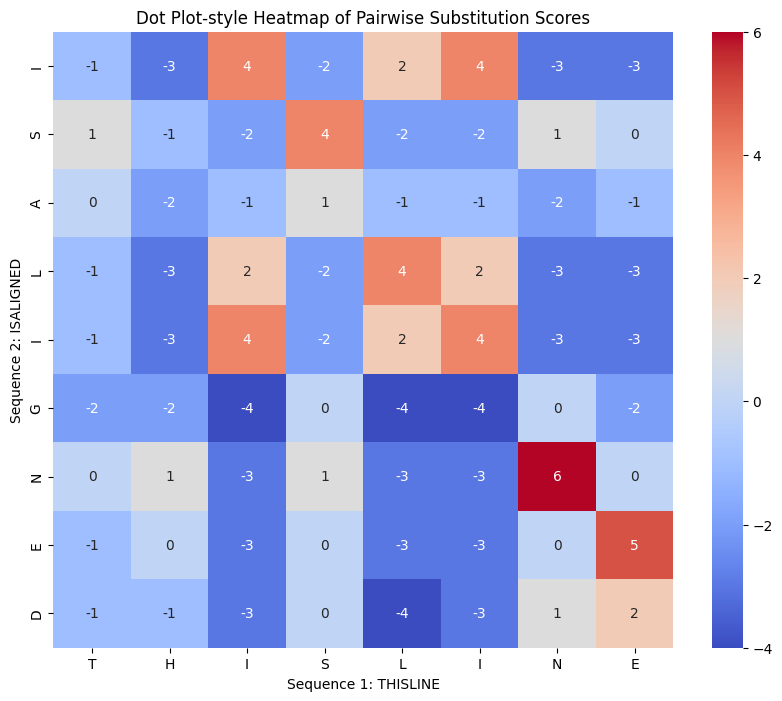

In [24]:
# 📊 Step 6: Dot Plot-style Heatmap of Substitution Scores
# ----------------------------------------------------------
import numpy as np # Import numpy

def plot_dotplot_heatmap(seq1, seq2, subst_matrix):
    matrix = np.zeros((len(seq2), len(seq1)))
    for i, a in enumerate(seq2):
        for j, b in enumerate(seq1):
            pair = (a.upper(), b.upper())
            score = subst_matrix.get(pair, subst_matrix.get((pair[1], pair[0]), -4))
            matrix[i, j] = score

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap="coolwarm", xticklabels=list(seq1), yticklabels=list(seq2))
    plt.xlabel("Sequence 1: {}".format(seq1))
    plt.ylabel("Sequence 2: {}".format(seq2))
    plt.title("Dot Plot-style Heatmap of Pairwise Substitution Scores")
    plt.show()

# 🔍 Visualize alignment grid (like Needleman-Wunsch without traceback)
plot_dotplot_heatmap(seq1.replace("-", ""), seq2.replace("-", ""), substitution_matrix)

# 📚 Student Exercises:
# 1. Try scoring different pairs of sequences with gap variations.
# 2. Modify gap_open and gap_extend, see how alignment changes.
# 3. Compare scoring using BLOSUM62 vs. PAM250.
# 4. Visualize the alignment substitution scores with heatmaps.

# 💬 Reflection:
# - Where are the highest substitution scores in the grid?
# - Do conserved stretches form diagonals?
# - What does the plot suggest about sequence similarity?